In [377]:
# import libs
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [420]:
# init list of tickers
tickers = ['AAPL', 'MSFT', 'GOOGL', 'TSLA', 'NVDA', 'META', 'AVGO', 'GOOG', 'MU', 'LLY', 'UNH', 'BAC', 'AMAT', 'COST',
          'INTC', 'JPM', 'QCOM', 'HD', 'NKE', 'SBUX', 'CRM', 'V', 'XOM', 'ADBE', 'DIS', 'TXN']
tickers = sorted(tickers)
tickers

['AAPL',
 'ADBE',
 'AMAT',
 'AVGO',
 'BAC',
 'COST',
 'CRM',
 'DIS',
 'GOOG',
 'GOOGL',
 'HD',
 'INTC',
 'JPM',
 'LLY',
 'META',
 'MSFT',
 'MU',
 'NKE',
 'NVDA',
 'QCOM',
 'SBUX',
 'TSLA',
 'TXN',
 'UNH',
 'V',
 'XOM']

In [421]:
# api call to get aggregate data for tickers

def get_stock_data(ticker, start_date, end_date):
    # Download the historical data for the ticker
    data = yf.download(ticker, start=start_date, end=end_date)
    
    # Keep only the Open and Close columns
    data = data[['Open', 'Close']]
    
    # Rename the columns to include the ticker name
    data.columns = [f'{ticker}_Open', f'{ticker}_Close']
    
    return data


In [422]:
# create a list of dfs for each ticker

def build_dfs(tickers):
    # Define the date range for the last 10 years
    end_date = pd.to_datetime('today')
    start_date = end_date - pd.DateOffset(years=10)
    
    dfs = []
    
    for ticker in tickers:
        data = get_stock_data(ticker, start_date, end_date)
        data = data.sort_values(by='Date', ascending=False)

        dfs.append(data)
    
    return dfs
    

In [423]:
stock_dfs = build_dfs(tickers)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [424]:
# have a look
len(stock_dfs)

26

In [425]:
stock_dfs[0].head()

,AAPL_Open,AAPL_Close
Date,,
2024-07-22,227.009995,223.960007
2024-07-19,224.820007,224.309998
2024-07-18,230.279999,224.179993
2024-07-17,229.449997,228.880005
2024-07-16,235.000000,234.820007


In [426]:
def check_null_locations(dfs, tickers):
    print(f"Checking for null values in tickers.")
    has_nulls = False
    for i, df in enumerate(dfs):
        
        has_nulls = df.isnull().values.any()
        if has_nulls:
            print(f"{tickers[i]} has null values!")
        
            null_locations = df.isnull()
            for col in null_locations.columns:
                null_rows = null_locations[null_locations[col]].index.tolist()
                if null_rows:
                    for row in null_rows:
                        print(f"Null value found at column '{col}', row index {row}")

    if not has_nulls:
        print("No null values found.")


In [427]:
# Check for null values and print locations
check_null_locations(stock_dfs, tickers)

Checking for null values in tickers.
No null values found.


In [428]:
# function calculate the slope 

def calculate_slope(df, ticker, duration):
    
    # Ensure the DataFrame is sorted by date in ascending order
    df = df.sort_values(by='Date', ascending=False)
    # Initialize the 'Slope' column with NaN values
    df[f'Slope_{duration}_Day'] = pd.NA
    
    # Iterate through the rows except the last one
    for i in range(len(df) - duration):
        y1 = df.iloc[i][f'{ticker}_Close']
        y2 = df.iloc[i + duration][f'{ticker}_Close']
        
        # Calculate rise and run
        rise = y2 - y1
        run = duration
        
        # Calculate slope and add it to the 'Slope' column
        slope = rise / run
        df.at[df.index[i], 'Slope'] = slope
    
    return df

def calculate_slopes_for_dfs(dfs, tickers):
    updated_dfs = []
    for index, df in enumerate(dfs):
        ticker = tickers[index]
        # Calculate slopes for each duration from 1 to 50 days
        for duration in range(1, 3):
            updated_df = calculate_slope(df, ticker, duration)
            updated_dfs.append(updated_df)
    return updated_dfs


In [429]:
stock_dfs = calculate_slopes_for_dfs(stock_dfs, tickers)

In [430]:
stock_dfs[0].head()

,AAPL_Open,AAPL_Close,Slope_1_Day,Slope
Date,,,,
2024-07-22,227.009995,223.960007,<NA>,0.349991
2024-07-19,224.820007,224.309998,<NA>,-0.130005
2024-07-18,230.279999,224.179993,<NA>,4.700012
2024-07-17,229.449997,228.880005,<NA>,5.940002
2024-07-16,235.000000,234.820007,<NA>,-0.420013


In [431]:
stock_dfs[0].tail()

,AAPL_Open,AAPL_Close,Slope_1_Day,Slope
Date,,,,
2014-07-29,24.8325,24.594999,<NA>,0.160000
2014-07-28,24.4550,24.754999,<NA>,-0.337500
2014-07-25,24.2125,24.417500,<NA>,-0.160000
2014-07-24,24.2600,24.257500,<NA>,0.040001
2014-07-23,23.8550,24.297501,<NA>,NaN


In [432]:
stock_dfs[0].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2024-07-22 to 2014-07-23
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AAPL_Open    2516 non-null   float64
 1   AAPL_Close   2516 non-null   float64
 2   Slope_1_Day  0 non-null      object 
 3   Slope        2515 non-null   float64
dtypes: float64(3), object(1)
memory usage: 162.8+ KB


In [345]:
# drop last row of each df
for i in range(len(stock_dfs)):
    df = stock_dfs[i]
    # Check if the last row contains any null values
    if df.iloc[-1].isnull().any():
        # Drop the last row if it does not contain any null values
        stock_dfs[i] = df.drop(df.index[-1])


In [346]:
stock_dfs[0].head()

,AAPL_Open,AAPL_Close,Slope
Date,,,
2024-07-22,227.009995,223.960007,0.349991
2024-07-19,224.820007,224.309998,-0.130005
2024-07-18,230.279999,224.179993,4.700012
2024-07-17,229.449997,228.880005,5.940002
2024-07-16,235.000000,234.820007,-0.420013


In [347]:
stock_dfs[0].tail()

,AAPL_Open,AAPL_Close,Slope
Date,,,
2014-07-30,24.610001,24.537500,0.057499
2014-07-29,24.832500,24.594999,0.16
2014-07-28,24.455000,24.754999,-0.3375
2014-07-25,24.212500,24.417500,-0.16
2014-07-24,24.260000,24.257500,0.040001


In [348]:
for i in range(len(stock_dfs)):
    stock_dfs[i]['Slope'] = pd.to_numeric(stock_dfs[i]['Slope'], errors='coerce')

In [349]:
stock_dfs[0].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2515 entries, 2024-07-22 to 2014-07-24
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   AAPL_Open   2515 non-null   float64
 1   AAPL_Close  2515 non-null   float64
 2   Slope       2515 non-null   float64
dtypes: float64(3)
memory usage: 78.6 KB


In [351]:
# Calculate percentage change
for i in range(len(tickers)):
    df = stock_dfs[i]
    
    # Reverse the DataFrame to calculate percentage change correctly
    df_reversed = df.iloc[::-1].copy()  # Create a copy of the reversed DataFrame
    
    # Calculate percentage changes using .loc
    df_reversed.loc[:, 'Close Pct Change'] = df_reversed[f'{tickers[i]}_Close'].pct_change() * 100
    df_reversed.loc[:, 'Slope Pct Change'] = df_reversed['Slope'].pct_change() * 100
    
    
    # Reverse the DataFrame back to its original order
    stock_dfs[i] = df_reversed.iloc[::-1]

In [352]:
stock_dfs[0].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2515 entries, 2024-07-22 to 2014-07-24
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   AAPL_Open         2515 non-null   float64
 1   AAPL_Close        2515 non-null   float64
 2   Slope             2515 non-null   float64
 3   Close Pct Change  2514 non-null   float64
 4   Slope Pct Change  2514 non-null   float64
dtypes: float64(5)
memory usage: 117.9 KB


In [353]:
stock_dfs[0].head()

,AAPL_Open,AAPL_Close,Slope,Close Pct Change,Slope Pct Change
Date,,,,,
2024-07-22,227.009995,223.960007,0.349991,-0.156030,-369.213615
2024-07-19,224.820007,224.309998,-0.130005,0.057991,-102.766054
2024-07-18,230.279999,224.179993,4.700012,-2.053483,-20.875248
2024-07-17,229.449997,228.880005,5.940002,-2.529598,-1514.241081
2024-07-16,235.000000,234.820007,-0.420013,0.179187,-89.118825


In [354]:
stock_dfs[0].tail()

,AAPL_Open,AAPL_Close,Slope,Close Pct Change,Slope Pct Change
Date,,,,,
2014-07-30,24.610001,24.537500,0.057499,-0.233783,-64.063133
2014-07-29,24.832500,24.594999,0.160000,-0.646333,-147.407416
2014-07-28,24.455000,24.754999,-0.337500,1.382204,110.937463
2014-07-25,24.212500,24.417500,-0.160000,0.659589,-499.990463
2014-07-24,24.260000,24.257500,0.040001,NaN,NaN


In [355]:
# drop last row of each df
for i in range(len(stock_dfs)):
    df = stock_dfs[i]
    # Check if the last row contains any null values
    if df.iloc[-1].isnull().any():
        # Drop the last row if it does not contain any null values
        stock_dfs[i] = df.drop(df.index[-1])

In [356]:
stock_dfs[0].head()

,AAPL_Open,AAPL_Close,Slope,Close Pct Change,Slope Pct Change
Date,,,,,
2024-07-22,227.009995,223.960007,0.349991,-0.156030,-369.213615
2024-07-19,224.820007,224.309998,-0.130005,0.057991,-102.766054
2024-07-18,230.279999,224.179993,4.700012,-2.053483,-20.875248
2024-07-17,229.449997,228.880005,5.940002,-2.529598,-1514.241081
2024-07-16,235.000000,234.820007,-0.420013,0.179187,-89.118825


In [357]:
stock_dfs[0].tail()

,AAPL_Open,AAPL_Close,Slope,Close Pct Change,Slope Pct Change
Date,,,,,
2014-07-31,24.290001,23.900000,0.637501,-2.598067,1008.717574
2014-07-30,24.610001,24.537500,0.057499,-0.233783,-64.063133
2014-07-29,24.832500,24.594999,0.160000,-0.646333,-147.407416
2014-07-28,24.455000,24.754999,-0.337500,1.382204,110.937463
2014-07-25,24.212500,24.417500,-0.160000,0.659589,-499.990463


In [358]:
stock_dfs[0].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2514 entries, 2024-07-22 to 2014-07-25
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   AAPL_Open         2514 non-null   float64
 1   AAPL_Close        2514 non-null   float64
 2   Slope             2514 non-null   float64
 3   Close Pct Change  2514 non-null   float64
 4   Slope Pct Change  2514 non-null   float64
dtypes: float64(5)
memory usage: 117.8 KB


In [359]:
# Check for null values and print locations
check_null_locations(stock_dfs, tickers)

Checking for null values in tickers.
No null values found.


In [368]:
def count_inf_rows(dfs, tickers):
    count_inf = []
    for i in range(len(dfs)):
        # Check for inf or -inf values
        inf_rows = dfs[i].isin([np.inf, -np.inf])
        # Count the number of rows with inf or -inf
        num_inf_rows = inf_rows.any(axis=1).sum()
        # Format the result string
        inf_str = f'{tickers[i]} inf rows: {num_inf_rows}'
        count_inf.append(inf_str)
    
    return count_inf

count_inf = count_inf_rows(stock_dfs, tickers)

for inf in count_inf:
    print(inf)


AAPL inf rows: 6
ADBE inf rows: 7
AMAT inf rows: 10
AVGO inf rows: 1
BAC inf rows: 34
COST inf rows: 7
CRM inf rows: 7
DIS inf rows: 8
GOOG inf rows: 0
GOOGL inf rows: 2
HD inf rows: 6
INTC inf rows: 18
JPM inf rows: 11
LLY inf rows: 8
META inf rows: 7
MSFT inf rows: 17
MU inf rows: 14
NKE inf rows: 13
NVDA inf rows: 7
QCOM inf rows: 6
SBUX inf rows: 13
TSLA inf rows: 2
TXN inf rows: 10
UNH inf rows: 5
V inf rows: 10
XOM inf rows: 9


In [370]:
for i in range(len(stock_dfs)):
    stock_dfs[i].replace([np.inf, -np.inf], np.nan, inplace=True)
    df_clean = stock_dfs[i].dropna()


In [371]:
count_inf = count_inf_rows(stock_dfs, tickers)

for inf in count_inf:
    print(inf)

AAPL inf rows: 0
ADBE inf rows: 0
AMAT inf rows: 0
AVGO inf rows: 0
BAC inf rows: 0
COST inf rows: 0
CRM inf rows: 0
DIS inf rows: 0
GOOG inf rows: 0
GOOGL inf rows: 0
HD inf rows: 0
INTC inf rows: 0
JPM inf rows: 0
LLY inf rows: 0
META inf rows: 0
MSFT inf rows: 0
MU inf rows: 0
NKE inf rows: 0
NVDA inf rows: 0
QCOM inf rows: 0
SBUX inf rows: 0
TSLA inf rows: 0
TXN inf rows: 0
UNH inf rows: 0
V inf rows: 0
XOM inf rows: 0



Debug Info for AAPL:
Unique values in Close Pct Change: [-0.15602998  0.0579913  -2.05348309 ... -0.64633348  1.38220385
  0.6595892 ]
Unique values in Slope Pct Change: [-369.21361502 -102.76605415  -20.87524789 ... -147.40741578  110.93746275
 -499.99046348]
Close Pct Change stats:
 count    2514.000000
mean        0.104568
std         1.795448
min       -12.864696
25%        -0.747957
50%         0.087149
75%         1.014353
max        11.980827
Name: Close Pct Change, dtype: float64
Slope Pct Change stats:
 count    2514.000000
mean             NaN
std              NaN
min             -inf
25%      -193.489353
50%      -101.282818
75%         2.363721
max              inf
Name: Slope Pct Change, dtype: float64

Debug Info for ADBE:
Unique values in Close Pct Change: [ 0.69328627 -1.05054788 -1.10818004 ... -0.59147225  0.1101545
 -0.24725316]
Unique values in Slope Pct Change: [-165.29954302   -6.25116152   80.87361121 ... -637.53934192 -144.4411478
 -123.68418411]
Close Pct Chan

/home/yewi/anaconda3/envs/dev-ai/lib/python3.10/site-packages/numpy/core/_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/home/yewi/anaconda3/envs/dev-ai/lib/python3.10/site-packages/numpy/core/_methods.py:118: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/home/yewi/anaconda3/envs/dev-ai/lib/python3.10/site-packages/numpy/core/_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/home/yewi/anaconda3/envs/dev-ai/lib/python3.10/site-packages/numpy/core/_methods.py:118: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/home/yewi/anaconda3/envs/dev-ai/lib/python3.10/site-packages/numpy/core/_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, kee

In [372]:
def correlate_dfs(dfs):
    corr_scores = []
    for i in range(len(dfs)):
        corr = dfs[i]['Close Pct Change'].corr(dfs[i]['Slope Pct Change'])
        corr_scores.append(corr)

    return corr_scores
        

In [373]:
correlations = correlate_dfs(stock_dfs)

for i in range(len(correlations)):
    print(f'Correlation for {tickers[i]}, {correlations[i]}')

Correlation for AAPL, -0.017720935741036076
Correlation for ADBE, 0.02629806471376388
Correlation for AMAT, -0.050221294648957616
Correlation for AVGO, 0.008194548523560788
Correlation for BAC, 0.007631222104647162
Correlation for COST, -0.04733011968099882
Correlation for CRM, -0.04247597707216351
Correlation for DIS, -0.03546948841798677
Correlation for GOOG, -0.02556163462157751
Correlation for GOOGL, -0.08042377301178537
Correlation for HD, -0.0011223455943062336
Correlation for INTC, -0.03188252450858782
Correlation for JPM, -0.052482104779270775
Correlation for LLY, 0.004965043928789985
Correlation for META, 0.05616097542971202
Correlation for MSFT, -0.027256154886532543
Correlation for MU, -0.009372463949926578
Correlation for NKE, 0.0416635230460561
Correlation for NVDA, 0.011828548405912106
Correlation for QCOM, 0.03955016871441799
Correlation for SBUX, 0.016348584921286824
Correlation for TSLA, 0.008066097401943324
Correlation for TXN, -0.04242743666233436
Correlation for UNH

ValueError: x and y must have same first dimension, but have shapes (1,) and (2514,)

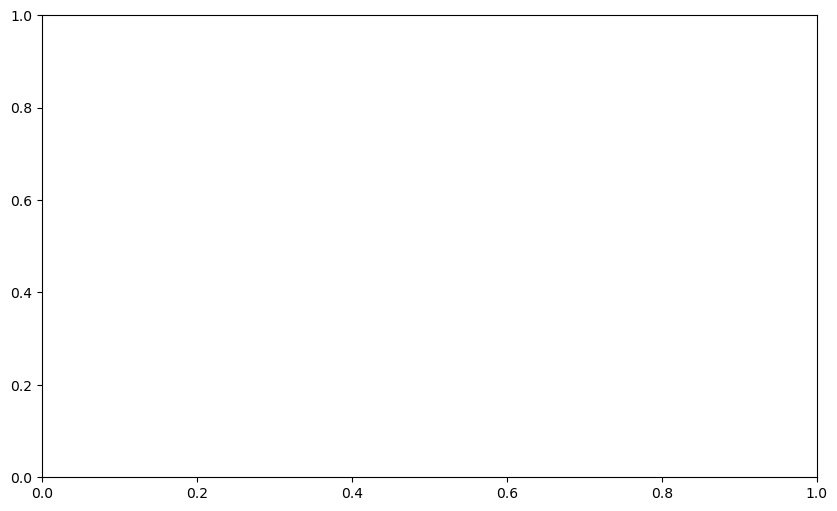

In [374]:
# Plotting
plt.figure(figsize=(10, 6))

plt.plot(stock_dfs.index, stock_dfs[0]['AAPL_Close'], label='Price', color='blue', marker='o')
plt.plot(stock_dfs.index, stock_dfs[0]['Slope'], label='Slope', color='red', marker='x')

plt.title('Plot of Price and Slope')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.grid(True)

plt.show()

In [172]:
import pandas as pd

# Sample DataFrame
data = {
    'Date': pd.date_range(start='2024-01-01', periods=10),
    'Column1': [100, 105, 110, 108, 115, 120, 125, 130, 100, 140]
}
df = pd.DataFrame(data)
df.set_index('Date', inplace=True)

# Calculate percent change
df['PercentChange'] = df['Column1'].pct_change() * 100

# Sort DataFrame by index in descending order
df = df.sort_index(ascending=False)

# Print the DataFrame
print(df)


            Column1  PercentChange
Date                              
2024-01-10      140      40.000000
2024-01-09      100     -23.076923
2024-01-08      130       4.000000
2024-01-07      125       4.166667
2024-01-06      120       4.347826
2024-01-05      115       6.481481
2024-01-04      108      -1.818182
2024-01-03      110       4.761905
2024-01-02      105       5.000000
2024-01-01      100            NaN


In [100]:
# Print the updated DataFrames with the new 'Slope' column
for ticker, df in zip(tickers, updated_dfs):
    print(f"Data for {ticker} with Slope column:")
    print(df.head())


NameError: name 'updated_dfs' is not defined

In [4]:
# function that builds a dataset of correlation scores for each slope 

In [5]:
# print the results 

In [6]:
# visualize the results (or the best over a threshold)

In [7]:
# build a function that will back test trading on slope correlation